<a href="https://colab.research.google.com/github/maksio1113/WSIZ_SI-LAB_1/blob/master/LAB2_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Przewidywanie klas
 
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
liczba_sasiadow_opis = 'Liczba sasiadow'
dokladnosci_skoringu_opis = 'Dokladnosc scoringu'
file_name_for_chart = "Lab2_Exercise2_LiczbaSasiadow_Dokladnosc.png"
file_name_for_chart2 = "Lab2_Exercise3_Wina.png"
#
# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()
#

Opis irysów w zbiorze to:  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ===

Text(0, 0.5, 'Dokladnosc scoringu')

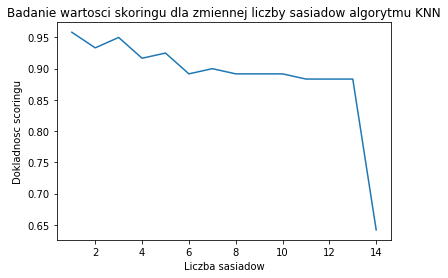

In [3]:
print('Opis irysów w zbiorze to: ', iris['DESCR'])
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
 
liczby_sasiadow = [1, 2, 3, 4, 5 , 6, 7, 8, 9, 10, 11, 12, 13, 14]
dokladnosci_skoringu = []
 
for neighbours_count in liczby_sasiadow:
    # W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
    knn = KNeighborsClassifier(neighbours_count)
 
    # Następnie naucz go na danych uczących
    knn.fit(X_train, y_train)
 
    # Zapisz wynik scoringu na danych testowych do osobnej listy
    dokladnosci_skoringu.append(knn.score(X_test, y_test))
 
print("Liczba sasiadow, Dokladnosc skoringu")
 
for liczba_sasiadow, dokladnosc_skoringu in zip(liczby_sasiadow, dokladnosci_skoringu):
    print([liczba_sasiadow, dokladnosc_skoringu])
 
# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.
# correlation = np.corrcoef(dokladnosci, lista_n)[0][1]
plt.plot(liczby_sasiadow, dokladnosci_skoringu)
plt.title('Badanie wartosci skoringu dla zmiennej liczby sasiadow algorytmu KNN')
plt.xlabel(liczba_sasiadow_opis)
plt.ylabel(dokladnosci_skoringu_opis)
 
# Zapisz do pliku obraz z wykresu
# plt.savefig(file_name_for_chart + '.png')

In [4]:
wines = datasets.load_wine()
############
# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
############
# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru win: ', list(wines.keys()))
# Etykiety które występują
print('Cechy win w zbiorze to: ', wines['feature_names'])
 
# konwersja na obiekt pandas.DataFrame
wines_df = pd.DataFrame(wines['data'], columns=wines['feature_names'])
 
# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: wines['target_names'][x], wines['target'])
 
# doklejenie informacji o gatunku do reszty dataframe
wines_df['species'] = np.array(list(targets))
 
# wykres
# sns.pairplot(wines_df, hue='species')
# plt.savefig(file_name_for_chart2)
 
# Podziel zbiór danych na uczący i testowy.
# Podzielmy zbiór na cechy oraz etykiety
X = wines.data
y = wines.target
 
# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
 
# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)
 
# Wytrenuj klasyfikator kNN
knn.fit(X_train, y_train)
 
# Przewidujemy wartości dla zbioru testowego
# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)
 
# Sprawdzamy kilka pierwszych wartości przewidzianych
print(["Wartosci przewidziane: ", y_pred[:5]])
 
# Sprawdzamy dokładność klasyfikatora
print(["Dokładność klasyfikatora: ", knn.score(X_test, y_test)])
 
# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print()
print("**** Raport z uczenia - classification_report ****")
print("Precision – What percent of your predictions were correct")
print("Recall – What percent of the positive cases did you catch")
print("The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall"
      "where an F-beta score reaches its best value at 1 and worst score at 0")
print("The support is the number of occurrences of each class in y_true")
print(classification_report(y_test, y_pred))
 
print()
print("**** Raport z uczenia - confusion_matrix ****")
print("x - Aktualna class")
print("y - Przewidziana class")
print('Klasy win w zbiorze to: ', wines['target_names'])
print(confusion_matrix(y_test, y_pred))
 
# Jak bardzo wyniki różnią się od prawdziwych wartości?
print("Raporty pokrywają się z rzeczywistością dla class_0")
print("Raporty nie pokrywają się z rzeczywistością dla class_1, class_2")

Elementy zbioru win:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
Cechy win w zbiorze to:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['Wartosci przewidziane: ', array([0, 2, 1, 1, 2])]
['Dokładność klasyfikatora: ', 0.6993006993006993]

**** Raport z uczenia - classification_report ****
Precision – What percent of your predictions were correct
Recall – What percent of the positive cases did you catch
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recallwhere an F-beta score reaches its best value at 1 and worst score at 0
The support is the number of occurrences of each class in y_true
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        46
           1       0.71      0.72      0.72        58
           2       0.